In [1]:
import numpy as np
def get_data():
    f = open('covtype.libsvm.binary.scale','r',encoding='utf-8')
    X,Y = [],[]
    for line in f.readlines():
        line = line.strip('\n').strip()
        data = line.split()
        n = len(data)
        for i in range(n):
            if i == 0:
                label = int(data[i])
                assert label == 1 or label == 2
                if label == 1:
                    Y.append(-1)
                else:
                    Y.append(1)
            else:
                x = [0 for i in range(54)]
                idx,nums = data[i].split(':')
                idx = int(idx)
                nums = float(nums)
                x[idx-1]=nums
        X.append(x)
    X = np.array(X)
    Y = np.array(Y).reshape(-1,1)
    return X,Y
    

In [2]:
X_all,Y_all = get_data()

In [3]:
print(X_all.shape)
print(Y_all.shape)

(581012, 54)
(581012, 1)


In [4]:
n = 10000
idxs = np.random.randint(0, X_all.shape[0],n)
print(idxs.shape)
X = X_all[idxs]
Y = Y_all[idxs]

(10000,)


In [5]:
X = np.hstack((X,np.ones(X.shape[0]).reshape(-1,1)))
print(X.shape)
print(Y.shape)

(10000, 55)
(10000, 1)


In [6]:
lamb = 10
def f(x,y,w):
    return  max(0,1-y*(np.dot(w.T,x))) + lamb*(np.dot(w.T,w))/2
    

In [7]:
def get_g(x,y,w):
    g = lamb*w
    if 1-y*(np.dot(w.T,x)) > 0:
        g -= y*x 
    return g

In [8]:
def svg(alpha,iter):
    w = np.ones((X.shape[1],1))
    # w = np.zeros((X.shape[1],1))
    ws = []
    d = np.zeros((X.shape[1],1))
    old_g = [0 for i in range(n)]
    loss_s = []
    min_loss = float('inf')
    res_w = np.ones((X.shape[1],1))
    for i in range(iter):
        loss = 0
        for j in range(n):
            x = X[j].reshape(-1,1)
            y = Y[j]
            loss += f(x,y,w)
        loss = loss/n
        loss_s.append(loss)
        ws.append(w)
        if loss < min_loss:
            min_loss = loss
            res_w = w
        print('iter: {}, loss = {}'.format(i,loss))
        idx = np.random.randint(0,n)
        x = X[idx].reshape(-1,1)
        y = Y[idx]
        g = get_g(x,y,w)
        d = d - old_g[idx] + g
        old_g[idx] = g
        w = w - alpha/n*d
    return res_w,ws,loss_s

In [9]:
lamb = 10000
w,ws,loss_s= svg(0.00001,520)

iter: 0, loss = [[275001.5621]]
iter: 1, loss = [[274996.06211708]]
iter: 2, loss = [[274985.06235125]]
iter: 3, loss = [[274968.5632625]]
iter: 4, loss = [[274946.56549079]]
iter: 5, loss = [[274919.06993602]]
iter: 6, loss = [[274886.07767799]]
iter: 7, loss = [[274847.59003641]]
iter: 8, loss = [[274803.60857084]]
iter: 9, loss = [[274754.13502045]]
iter: 10, loss = [[274699.17136418]]
iter: 11, loss = [[274638.71982061]]
iter: 12, loss = [[274572.78278779]]
iter: 13, loss = [[274501.36292322]]
iter: 14, loss = [[274424.46306364]]
iter: 15, loss = [[274342.08630505]]
iter: 16, loss = [[274254.23594248]]
iter: 17, loss = [[274160.91548992]]
iter: 18, loss = [[274062.12868025]]
iter: 19, loss = [[273957.87946488]]
iter: 20, loss = [[273848.17201371]]
iter: 21, loss = [[273733.01071514]]
iter: 22, loss = [[273612.40017551]]
iter: 23, loss = [[273486.34521921]]
iter: 24, loss = [[273354.85086853]]
iter: 25, loss = [[273217.92240321]]
iter: 26, loss = [[273075.56528033]]
iter: 27, loss =

In [10]:
print(w)

[[0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.00127343]
 [0.00127288]
 [0.00127332]
 [0.0012727 ]
 [0.00127348]
 [0.00127241]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.00126968]
 [0.00127316]
 [0.00127436]
 [0.00127294]
 [0.0012736 ]
 [0.0012736 ]
 [0.0012736 ]
 [0.00127331]
 [0.0012736 ]
 [0.00127271]
 [0.00127327]
 [0.00127346]
 [0.00126985]
 [0.00126983]
 [0.00127038]
 [0.0012736 ]
 [0.00127332]
 [0.00127354]
 [0.0012736 ]
 [0.00126924]
 [0.00127282]
 [0.00127163]
 [0.00126958]
 [0.00127022]
 [0.0012733 ]
 [0.00127339]
 [0.0012736 ]
 [0.0012736 ]
 [0.00127168]
 [0.0012715 ]
 [0.00127197]
 [0.00123246]]


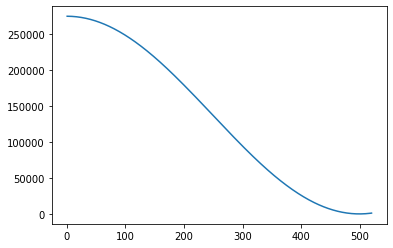

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
x = [i+1 for i in range(len(loss_s))]
y = [a[0] for a in loss_s]
plt.figure()
plt.plot(x,y)
plt.show()

In [12]:
n = 3000
idxs = np.random.randint(0, X_all.shape[0],n)
print(idxs.shape)
X = X_all[idxs]
Y = Y_all[idxs]

X = np.hstack((X,np.ones(X.shape[0]).reshape(-1,1)))
print(X.shape)
print(Y.shape)

(3000,)
(3000, 55)
(3000, 1)


In [13]:
loss_test = []
for i in range(len(ws)):
    l = 0
    for j in range(n):
        x = X[j].reshape(-1,1)
        y = Y[j]
        l += f(x,y,ws[i])
    loss_test.append(l/n)
    

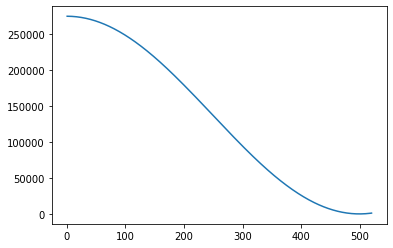

In [14]:
x = [i+1 for i in range(len(loss_test))]
y = [a[0] for a in loss_test]
plt.figure()
plt.plot(x,y)
plt.show()

In [15]:
n = 10000
idxs = np.random.randint(0, X_all.shape[0],n)
print(idxs.shape)
X = X_all[idxs]
Y = Y_all[idxs]

X = np.hstack((X,np.ones(X.shape[0]).reshape(-1,1)))
print(X.shape)
print(Y.shape)

(10000,)
(10000, 55)
(10000, 1)


In [16]:
def svrg(alpha,iter):
    w = np.ones((X.shape[1],1))
    res_w = np.ones((X.shape[1],1))
    ws,loss_s = [],[]
    inner_m = 300
    min_loss = float('inf')
    for i in range(iter):
        loss = 0
        for j in range(n):
            x = X[j].reshape(-1,1)
            y = Y[j]
            loss += f(x,y,w)
        loss = loss/n
        if loss < min_loss:
            min_loss = loss
            res_w = w
        loss_s.append(loss)
        ws.append(w)
        print('iter: {}, loss = {}'.format(i,loss))
        R = 0
        for j in range(X.shape[0]):
            x = X[j].reshape(-1,1)
            y = Y[j]
            R += get_g(x,y,w)
        R =R/n
        w_t = w
        for j in range(inner_m):
            idx = np.random.randint(0,n)
            x = X[idx].reshape(-1,1)
            y = Y[idx]
            g_t = get_g(x,y,w_t) - (get_g(x,y,w) - R)
            w_t = w_t - alpha*g_t
        w = w_t
    return res_w,ws,loss_s


In [17]:
lamb = 100
w,ws,loss_s= svrg(0.0001,30)

iter: 0, loss = [[2751.5324]]
iter: 1, loss = [[7.61084848]]
iter: 2, loss = [[1.01585619]]
iter: 3, loss = [[0.99999518]]
iter: 4, loss = [[0.99995703]]
iter: 5, loss = [[0.99995694]]
iter: 6, loss = [[0.99995694]]
iter: 7, loss = [[0.99995694]]
iter: 8, loss = [[0.99995694]]
iter: 9, loss = [[0.99995694]]
iter: 10, loss = [[0.99995694]]
iter: 11, loss = [[0.99995694]]
iter: 12, loss = [[0.99995694]]
iter: 13, loss = [[0.99995694]]
iter: 14, loss = [[0.99995694]]
iter: 15, loss = [[0.99995694]]
iter: 16, loss = [[0.99995694]]
iter: 17, loss = [[0.99995694]]
iter: 18, loss = [[0.99995694]]
iter: 19, loss = [[0.99995694]]
iter: 20, loss = [[0.99995694]]
iter: 21, loss = [[0.99995694]]
iter: 22, loss = [[0.99995694]]
iter: 23, loss = [[0.99995694]]
iter: 24, loss = [[0.99995694]]
iter: 25, loss = [[0.99995694]]
iter: 26, loss = [[0.99995694]]
iter: 27, loss = [[0.99995694]]
iter: 28, loss = [[0.99995694]]
iter: 29, loss = [[0.99995694]]


In [18]:
print(w)

[[ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [ 3.34554622e-11]
 [-4.69999665e-05]
 [-9.39999665e-05]
 [-3.59999666e-05]
 [-1.01999967e-04]
 [-3.89999665e-05]
 [-8.99999665e-05]
 [ 1.00003345e-06]
 [ 2.00003345e-06]
 [ 1.80000334e-05]
 [-2.07999966e-04]
 [ 1.01000033e-04]
 [ 4.42000033e-04]
 [ 1.82000033e-04]
 [-8.99996654e-06]
 [ 3.34554622e-11]
 [ 1.30000335e-05]
 [-2.19999666e-05]
 [ 4.00000334e-05]
 [-2.69999666e-05]
 [ 2.00000335e-05]
 [-1.59999665e-05]
 [-2.89999966e-04]
 [-2.62999967e-04]
 [-4.99999665e-05]
 [ 5.00003345e-06]
 [ 2.10000335e-05]
 [-9.99996655e-06]
 [ 2.20000335e-05]
 [ 4.33000033e-04]
 [ 1.40000033e-04]
 [ 1.80000334e-05]
 [ 1.19000034e-04]
 [ 7.80000336e-05]
 [ 2.50000334e-05]
 [-3.19999665e-05]
 [ 3.34548135e-11]
 [-6.99996654e-06]
 [-2.38999967e-04]
 [-1.9799996

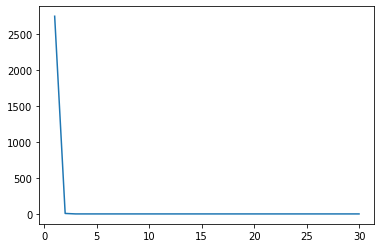

In [19]:
x = [i+1 for i in range(len(loss_s))]
y = [a[0] for a in loss_s]
plt.figure()
plt.plot(x,y)
plt.show()

In [20]:
n = 3000
idxs = np.random.randint(0, X_all.shape[0],n)
print(idxs.shape)
X = X_all[idxs]
Y = Y_all[idxs]

X = np.hstack((X,np.ones(X.shape[0]).reshape(-1,1)))
print(X.shape)
print(Y.shape)

(3000,)
(3000, 55)
(3000, 1)


In [21]:
loss_test = []
for i in range(len(ws)):
    l = 0
    for j in range(n):
        x = X[j].reshape(-1,1)
        y = Y[j]
        l += f(x,y,ws[i])
    loss_test.append(l/n)

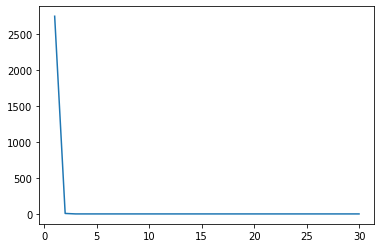

In [22]:
x = [i+1 for i in range(len(loss_test))]
y = [a[0] for a in loss_test]
plt.figure()
plt.plot(x,y)
plt.show()